In [8]:
%matplotlib inline
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import Image, display

import SimpleITK as sitk

In [52]:
def memory_function(infile, dataset):
    with open(infile, 'r') as mem:
        lines = mem.readlines()

    testar = np.asarray([line.strip() for line in lines]).astype(float)/1000

    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(0, testar.shape[0]), testar - min(testar), linewidth=5)
    ax.set_ylabel(r'mem use (GB)', fontsize=20)
    ax.set_xlabel(r'Time (s)', fontsize=20)
    ax.set_title(r'%s max = %.2f GB; mean = %.2f GB' % (dataset, max(testar) - np.min(testar), np.mean(testar) - np.min(testar)), fontsize=20)
    fig.set_size_inches(8, 2)
    fig.tight_layout()
    return fig

def cpu_function(infile, dataset):
    with open(infile, 'r') as cpuf:
        lines = cpuf.readlines()

    testar = [re.split(',',line.strip()) for line in lines][0:-1]
    
    corear = np.zeros((len(testar), len(testar[0])))
    for i in range(0, len(testar)):
        corear[i,:] = np.array([float(cpu) for cpu in testar[i]])
    
    fig=plt.figure()
    ax = fig.add_subplot(111)
    lines = [ax.plot(corear[:,i], '--', label='cpu '+ str(i), 
                     alpha=0.5, linewidth=5)[0] for i in range(0, corear.shape[1])]
    
    total = corear.sum(axis=1)
    lines.append(ax.plot(total, label='all cores')[0])
    
    labels = [h.get_label() for h in lines]
    
#     fig.legend(handles=lines, labels=labels, loc='lower center', prop={'size':20},ncol=2, bbox_to_anchor=(0.5, -.14))
#     fig.legend(handles=lines, labels=labels, loc=3, prop={'size':20}, ncol=2, bbox_to_anchor=(0.5, -.14))
    plt.legend(handles=lines, labels=labels, bbox_to_anchor=(1.05, 1), ncol=2, loc=2, borderaxespad=0.)
    ax.set_ylabel('CPU use (%)', fontsize=20)
    ax.set_ylim([0, max(total)+10])
    ax.set_xlabel('Time (s)', fontsize=20)
    ax.set_title('%s max = %.1f; mean = %.1f' % (dataset, max(total), np.mean(total)), fontsize=20)
    fig.set_size_inches(8, 2)
    fig.tight_layout()
    return fig

def disk_function(infile, dataset):
    with open(infile, 'r') as disk:
        lines = disk.readlines()

    testar = np.asarray([line.strip() for line in lines]).astype(float)/1000000

    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(0, testar.shape[0]), testar - min(testar))
    ax.set_ylabel('Disk usage GB')
    ax.set_xlabel('Time (30 s)')
    ax.set_title('%s max = %.2f GB; mean = %.2f GB' % (dataset, max(testar) - np.min(testar), np.mean(testar) - np.min(testar)))
    return fig

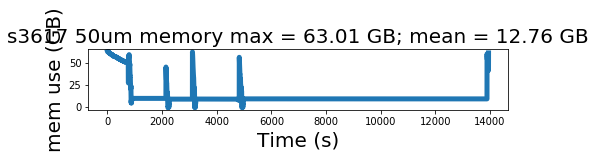

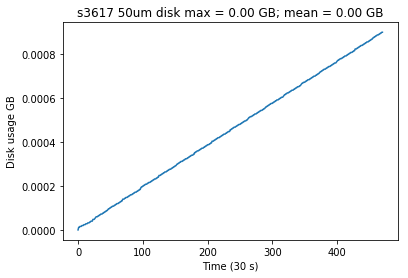

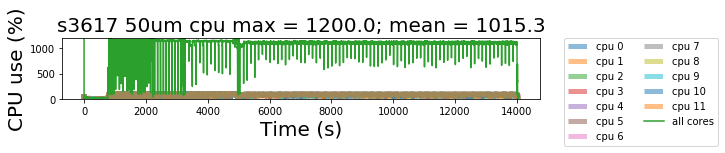

In [53]:
memfig = memory_function('profiling_output_2/mem.txt', 's3617 50um memory')
diskfig = disk_function('profiling_output_2/disk.txt', 's3617 50um disk')
cpufig = cpu_function('profiling_output_2/cpu.txt', 's3617 50um cpu')
# display(Image(filename='/data/BIDs_test/sub-0025864/outputs/qa/sub-0025864_ses-1_bold/reg/func/align/template/fnirt_score_851/sub-0025864_ses-1_bold_aligned_epi2temp.png'))
memfig.show()
diskfig.show()
cpufig.show()

In [12]:
sampleImgReoriented = sitk.ReadImage('output_2/sampleImgReoriented.tif')

In [14]:
imgArr = sitk.GetArrayFromImage(sampleImgReoriented)
print(type(imgArr))
print(imgArr.shape)

<type 'numpy.ndarray'>
(922, 1272, 1311)


In [33]:
loaded_tiff_slice = imgArr[700,:,:]

print(loaded_tiff_slice.shape)
print(loaded_tiff_slice)

(1272, 1311)
[[  0   0   0 ...,   0   0   0]
 [100 101 101 ..., 101  98 102]
 [100 103 100 ..., 102  98  99]
 ..., 
 [111  99 101 ..., 102  99 106]
 [107 101 100 ..., 106  94 103]
 [111 103 101 ..., 100 100 103]]


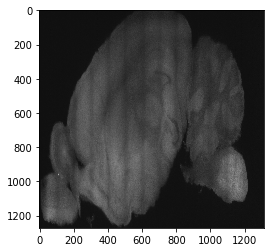

In [34]:
plt.imshow(loaded_tiff_slice, cmap='gray')
plt.show()

# edited cpu function

In [ ]:
def cpu_function(infile, dataset):
    with open(infile, 'r') as cpuf:
        lines = cpuf.readlines()

    testar = [re.split(',',line.strip()) for line in lines][0:-1]
    
    corear = np.zeros((len(testar), len(testar[0])))
    for i in range(0, len(testar)):
        corear[i,:] = np.array([float(cpu) for cpu in testar[i]])
        
    total = corear.sum(axis=1)

    fig=plt.figure()
    ax = fig.add_subplot(111)
    lines = [ax.plot(corear[:,i], '--', label='cpu '+ str(i), 
                     alpha=0.5, linewidth=5)[0] for i in range(0, corear.shape[1])]
    
    lines.append(ax.plot((total/max(total))*100 , label='all cores')[0])
    
    labels = [h.get_label() for h in lines]
    
#     fig.legend(handles=lines, labels=labels, loc='lower center', prop={'size':20},ncol=2, bbox_to_anchor=(0.5, -.14))
    ax.set_ylabel('CPU use (%)', fontsize=20)
#     ax.set_ylim([0, max(total)+10])
    ax.set_ylim([0, 100])
    ax.set_xlabel('Time (s)', fontsize=20)
    ax.set_title('%s max = %.1f; mean = %.1f' % (dataset, max(total), np.mean(total)), fontsize=20)
    fig.set_size_inches(8, 2)
    fig.tight_layout()
    return fig